In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import os

#### Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

## I'm creating my own input and input cleaner function. 

- That way I can use it for any database in the Codeup DS database.

In [3]:
database_choice = input("Which database do you wish to use? \n(Plese only use a string):")
print(database_choice)

Which database do you wish to use? 
(Plese only use a string):



In [242]:
# Function to force the use of a string: (For loop back)
database_choice = input("Which database do you wish to use? \n(Plese only use a string):")


def input_choice():
    database_choice_func = input("Which database do you wish to use? \n(Plese only use a string):")
        
    if type(database_choice_func) == str:
        return database_choice_func
    else:
        database_choice_func = input('Please only use a string: ')

Which database do you wish to use? 
(Plese only use a string):123


In [238]:
type(database_choice)

str

In [239]:
input_choice()

Which database do you wish to use? 
(Plese only use a string):123


'123'

In [4]:
from env import host, user, password

In [5]:
def get_db(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [6]:
sql_query = 'SELECT * FROM passengers'

In [329]:
get_titanic_data = pd.read_sql(sql_query, get_db('titanic_db'))
get_titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [132]:
def get_titanic_data():
    return pd.read_sql('SELECT * FROM passengers', get_db('titanic_db'))

In [133]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [7]:
def get_iris_data():
    return pd.read_sql('''SELECT measurement_id, sepal_length, sepal_width, petal_length, petal_width, m.species_id, species_name
FROM measurements AS m
JOIN species AS s on m.species_id = s.species_id;''', get_db('iris_db'))

In [8]:
get_iris_data()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [125]:
def get_titanic_data_cache():
    filename = 'titanic.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        titanic_df = pd.read_sql('SELECT * FROM passengers', get_db('titanic_db'))
        titanic_df.to_csv(filename, index = False)
        # Ryan was using .to_file, but I was getting error when trying to use that function.
        return titanic_df

In [124]:
get_titanic_data_cache()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [126]:
type(get_titanic_data_cache())

pandas.core.frame.DataFrame

In [142]:
df_titanic = get_titanic_data_cache()

In [143]:
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


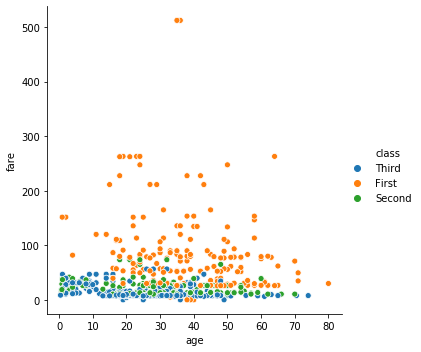

In [149]:
sns.relplot(data = df_titanic, x = 'age', y = 'fare', hue = 'class')
plt.show()

In [ ]:
plt.hist

In [10]:
# Creating the same thing for the iris database:

def get_iris_data_cache():
    filename = 'iris.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        iris_df = get_iris_data()
        iris_df.to_csv(filename, index = False)
        # Ryan was using .to_file, but I was getting error when trying to use that function.
        return iris_df

In [11]:
get_iris_data_cache()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [197]:
# I did the last three exercises first, and tested the code out in jupyter notebook before writing the code in VS Code.

## 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 

### Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?


In [16]:
# I should perhaps do this merge in pandas instead of sql since the species_id column will be duplicated.

iris_query = '''SELECT * FROM measurements AS m JOIN species AS s on m.species_id = s.species_id'''

In [17]:
df_iris = pd.read_sql(iris_query, get_db('iris_db'))
df_iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,3,virginica
147,148,6.5,3.0,5.2,2.0,3,3,virginica
148,149,6.2,3.4,5.4,2.3,3,3,virginica


In [18]:
# print the first 3 rows

print(df_iris.head(3))

   measurement_id  sepal_length  sepal_width  petal_length  petal_width  \
0               1           5.1          3.5           1.4          0.2   
1               2           4.9          3.0           1.4          0.2   
2               3           4.7          3.2           1.3          0.2   

   species_id  species_id species_name  
0           1           1       setosa  
1           1           1       setosa  
2           1           1       setosa  


In [19]:
# Cleaning up the extra column

# df_iris.columns | Use this for returning a list of the column titles.

df_iris = df_iris.loc[:,~df_iris.columns.duplicated()]
df_iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [20]:
# print the number of rows and columns (shape)
df_iris.shape

(150, 7)

In [21]:
df_iris.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id', 'species_name'],
      dtype='object')

In [22]:
df_iris.columns.to_list()

['measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_id',
 'species_name']

In [23]:
# print the column names
# print the data type of each column

df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [24]:
# I used .info to find the column dtypes, but I could also use dtypes function itself:

df_iris.dtypes

measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
species_name       object
dtype: object

In [25]:
# print the summary statistics for each of the numeric variables. 


df_iris.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [50]:
# Would you recommend rescaling the data based on these statistics?

# Yes, it would be helpful to rescale this dataset. At this point, I'm thinking that using data standardization would be useful if we are going to use a model that relies on the distribution of attributes.
# My answer was in part informed by this article from the 'exocortex': https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

## 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [56]:
df_excel = pd.read_excel(r'~/codeup-data-science/classification-exercises/spreadsheets_exercises.xlsx', sheet_name = 'Table1_CustDetails')
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,price per service:
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,NaN,NaN
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,NaN,NaN
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,NaN,NaN
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,NaN,NaN


In [57]:
df_excel_sample = pd.read_excel(r'~/codeup-data-science/classification-exercises/spreadsheets_exercises.xlsx', sheet_name = 'Table1_CustDetails', nrows = 100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,price per service:
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0164-APGRB,Female,0,No,No,2,2,2,Electronic check,114.90,8496.70,No,NaN,NaN
96,0164-XAIRP,Female,0,No,No,1,0,2,Bank transfer (automatic),19.55,470.20,No,NaN,NaN
97,0168-XZKBB,Female,0,Yes,No,2,2,0,Electronic check,86.85,1564.40,No,NaN,NaN
98,0174-QRVVY,Male,0,Yes,Yes,2,0,2,Credit card (automatic),25.35,1847.55,No,NaN,NaN


In [206]:
# print the number of rows of your original dataframe

print(df_excel.shape[0])



7049


In [72]:
# print the first 5 column names

print(df_excel.columns[:5])

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')


In [73]:
# print the column names that have a data type of object

df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7049 non-null   object 
 1   gender              7049 non-null   object 
 2   is_senior_citizen   7049 non-null   int64  
 3   partner             7049 non-null   object 
 4   dependents          7049 non-null   object 
 5   phone_service       7049 non-null   int64  
 6   internet_service    7049 non-null   int64  
 7   contract_type       7049 non-null   int64  
 8   payment_type        7049 non-null   object 
 9   monthly_charges     7049 non-null   float64
 10  total_charges       7038 non-null   float64
 11  churn               7049 non-null   object 
 12  Unnamed: 12         0 non-null      float64
 13  price per service:  0 non-null      float64
dtypes: float64(4), int64(4), object(6)
memory usage: 771.1+ KB


In [102]:
# Trying to print only object columns into a list.

test_series = df_excel.columns.to_series().groupby(df_excel.dtypes == object).groups
test_series

{False: ['is_senior_citizen', 'phone_service', 'internet_service', 'contract_type', 'monthly_charges', 'total_charges', 'Unnamed: 12', 'price per service:'], True: ['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']}

In [76]:
df_excel.loc[:, df_excel.dtypes == object]

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [152]:
# print the column names that have a data type of object

print(list(df_excel.select_dtypes(include = ['object']).columns))

# Found this solution here: https://stackoverflow.com/questions/21271581/selecting-pandas-columns-by-dtype

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']


In [210]:
# compute the range for each of the numeric variables.

telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80


In [211]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


In [175]:
df_excel = df_excel.drop(columns = 'Unnamed: 12')
df_excel = df_excel.drop(columns = 'price per service:')

In [202]:
# I need to change several columns to the object dtype first:

df_excel = df_excel.astype({"is_senior_citizen": "object", "phone_service": "object", "internet_service": "object", "contract_type": "object"})

df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   object 
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   object 
 6   internet_service   7049 non-null   object 
 7   contract_type      7049 non-null   object 
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), object(10)
memory usage: 661.0+ KB


In [203]:
df_excel.select_dtypes(include = 'object').head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,Yes


In [204]:
print(df_excel.monthly_charges.max() - df_excel.monthly_charges.min())
print(df_excel.total_charges.max() - df_excel.total_charges.min())

# The phone_service and internet_service and contract_type columns are technically numerical columns, but they are being used as categorical columns, so didn't run range on them.

100.5
8666.0


## 3. Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [157]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'

csv_export_url = sheet_url.replace('/edit?usp', '/export?format=csv&usp=')

df_googlesheet = pd.read_csv(csv_export_url)

# printing the first three rows:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [159]:
# print the number of rows and columns

df_googlesheet.shape

(891, 12)

In [160]:
# print the column names

df_googlesheet.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
# print the data type of each column

df_googlesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
# print the summary statistics for each of the numeric variables

df_googlesheet.describe()

# Would probably need to reshape this data since the means are so different. Or at least normalize the dataframe.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
df_googlesheet.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [185]:
df_googlesheet.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [191]:
# print the unique values for each of your categorical variables
# I'm sure there is a much simpler way to do this, and return the dataframe automatically. However I'm struggling to figure it out.

a_df = df_googlesheet.Age.unique()
print(a_df)

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [192]:
print(df_googlesheet.Sex.unique())

['male' 'female']


In [193]:
em_df = df_googlesheet.Embarked.unique()
print(em_df)

['S' 'C' 'Q' nan]


In [194]:
sur_df = df_googlesheet.Survived.unique()
print(sur_df)

[0 1]


In [196]:
pclass_df = df_googlesheet.Embarked.unique()
print(pclass_df)

['S' 'C' 'Q' nan]


## Walkthrough Solutions

In [213]:
for col in df_googlesheet:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [216]:
# Faith used value_counts. I interpreted the question differently, but both ways are useful. That's the cool thing about coding!

df_googlesheet.Pclass.value_counts(dropna=False)

# I like value_counts better, since it shows more information than just .unique()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

## 1. Iris Data

- Use the function defined in acquire.py to load the iris data.
- Drop the species_id and measurement_id columns.
- Rename the species_name column to just species.
- Create dummy variables of the species name.
- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [17]:
# Initial setup of credentials:

from env import host, user, password

In [18]:
# This time, opted for the USING() method in SQL, which removed the need to drop the duplicate columns in pandas or writing out each column I wanted to use in the SELECT portion of the SQL query.
# Short story, this is much cleaner code. 

def get_iris_data():
    return pd.read_sql('''SELECT *
FROM measurements
JOIN species USING(species_id);''', get_db('iris_db'))

In [19]:
iris = get_iris_data()
iris

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...
145,3,146,6.7,3.0,5.2,2.3,virginica
146,3,147,6.3,2.5,5.0,1.9,virginica
147,3,148,6.5,3.0,5.2,2.0,virginica
148,3,149,6.2,3.4,5.4,2.3,virginica


In [251]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [254]:
iris = iris.drop(columns = ['species_id', 'measurement_id'])

In [255]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [260]:
iris = iris.rename(columns = {'student': 'species'})
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
import aquire as aq

End of file.


In [27]:
aq.get_iris_data_cache()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [28]:
iris = aq.get_iris_data_cache()
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [30]:
iris = iris.rename(columns = {'species_name': 'species'})

In [31]:
iris = iris.drop(columns = ['species_id', 'measurement_id'])

In [303]:
# Doing a quick check of the value counts in the species column before I create dummy variables.
# I want to have an idea of what I'm working with before I start assigning variables and using functions.

iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [304]:
# I ran through this using a test variable before I used the main dataframe. Need to get out of that habit since I can just reload the data.

iris_test = iris
iris_test

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [436]:
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


In [301]:
dummy_df = pd.get_dummies(iris['species'], dummy_na=False)

iris = pd.concat([iris, dummy_df], axis=1)

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [307]:
# I'm simply using the components I created above to make the function. Pretty cool!
# Put x in, inside the function so that whatever I feed the function is prepped using this function.

def prep_iris(x):
    x = x.rename(columns = {'species_name': 'species'})
    x = x.drop(columns = ['species_id', 'measurement_id'])
    dummy_df = pd.get_dummies(x['species'], dummy_na=False)
    x = pd.concat([x, dummy_df], axis=1)
    

In [319]:
iris = aq.get_iris_data_cache()
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [330]:
def prep_iris(x): 
    x.rename(columns = {'species_name': 'species'}, inplace=True)
    x = x.drop(columns = ['species_id', 'measurement_id'])
    dummy_df = pd.get_dummies(x['species'], dummy_na=False)
    x = pd.concat([x, dummy_df], axis=1)
    return x

In [331]:
prep_iris(aq.get_iris_data_cache())

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [312]:
prep_iris(aq.get_iris_data_cache())
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


In [311]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


## 2. Titanic Data

- Use the function you defined in acquire.py to load the titanic data set.
- Handle the missing values in the embark_town and embarked columns.
- Remove the deck column.
- Create a dummy variable of the embarked column.
- Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
- Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.
- Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied

In [333]:
import aquire as aq

In [334]:
titanic_data = aq.get_titanic_data_cache()
titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [335]:
# Finding the % of a column's observations that are missing values. The Deck column is mostly missing observations.

missing_vals = titanic_data.isnull().sum()/len(titanic_data)*100
print(missing_vals)

passenger_id     0.000000
survived         0.000000
pclass           0.000000
sex              0.000000
age             19.865320
sibsp            0.000000
parch            0.000000
fare             0.000000
embarked         0.224467
class            0.000000
deck            77.216611
embark_town      0.224467
alone            0.000000
dtype: float64


In [344]:
# Finding the sum of missing values in each column. Embarked and embark_town have the same number of missing values, so theoretically, removing the missing rows from one column will fix the problem in the other similar column.

titanic_data.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          0
class             0
deck            688
embark_town       0
alone             0
dtype: int64

In [342]:
# Handle the missing values in the embark_town and embarked columns.

titanic_data = titanic_data[~titanic_data.embark_town.isnull()]
titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [345]:
# And so it did. We are not 2 rows shorter than before, as anticipated.

titanic_data.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          0
class             0
deck            688
embark_town       0
alone             0
dtype: int64

#### Remove the deck column.

In [346]:
titanic_data = titanic_data.drop(columns = 'deck')

#### Create a dummy variable of the embarked column.

In [348]:
# Although this was shown in the curriculum as one step in one cell, I wanted to see the results before the concatination.

dummy_titanic_df = pd.get_dummies(titanic_data['embarked'], dummy_na = False)
dummy_titanic_df

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [349]:
# Now we concatinate both dataframes.

titanic_data = pd.concat([titanic_data, dummy_titanic_df], axis=1)

titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,0,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,1,0,0


## Imputing and Scaling Exercises

Problems 2e - 2g

#### 2e. Scale the age and fare columns using a min max scaler. 
- Why might this be beneficial? 
- When might you not want to do this?

In [388]:
# First, splitting the data into a train, validate and test groups:

from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(titanic_data, test_size = .2, random_state=123, stratify = titanic_data.survived)

train_validate.shape, test.shape

((711, 16), (178, 16))

In [389]:
# Then splitting the train_validate df's into their own separate df's:

train, validate = train_test_split(train_validate, test_size = .3, random_state = 123, stratify = train_validate.survived)

train.shape, validate.shape

((497, 16), (214, 16))

In [386]:
test.age.mean()

30.321567164179104

In [405]:
# Now, using the MinMaxScaler method on the missing data in the fare and age columns:

from sklearn.preprocessing import MinMaxScaler

In [393]:
scaler_test = MinMaxScaler()
scaler_test.fit(train[['fare']])
test_scale_test = scaler_test.transform(train[['fare']])[0:5]
test_scale_test

array([[0.07831878],
       [0.26252652],
       [0.07746484],
       [0.14891148],
       [0.28598956]])

In [394]:
type(test_scale_test)

numpy.ndarray

In [395]:
test_scale_test.shape

(5, 1)

In [404]:
scaler = MinMaxScaler
scaler.fit(train[['age']])
scaler.transform(train[['age']])[0:5]


TypeError: fit() missing 1 required positional argument: 'X'

In [397]:
train

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S,age_scaled
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,1,0,0,0.447097
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,1,0,0,0.509927
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,0,1,0.082684
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,1,0,0,0.396833
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.0,0,0,7.8958,S,Third,Southampton,1,0,0,1,0.346569
636,636,0,3,male,32.0,0,0,7.9250,S,Third,Southampton,1,0,0,1,0.396833
222,222,0,3,male,51.0,0,0,8.0500,S,Third,Southampton,1,0,0,1,0.635587
485,485,0,3,female,24.0,3,1,25.4667,S,Third,Southampton,0,0,0,1,NaN


In [15]:
scaler.fit(titanic_data[['age']])

NameError: name 'scaler' is not defined

In [ ]:
# Working with the Scalar function:

In [357]:
from sklearn.preprocessing import MinMaxScaler

In [406]:
scaler = MinMaxScaler()

scaler.fit(titanic_data[['age']])
age_scaler = scaler.transform(titanic_data[['age']])
titanic_data['age_scaled'] = age_scaler

In [407]:
titanic_data

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S,age_scaled
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,0,1,0.271174
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1,0,0,0.472229
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,0,1,0.321438
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0,1,0.434531
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,0,1,0.434531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,0,0,1,0.334004
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,0,0,1,0.233476
888,888,0,3,female,24.0,1,2,23.4500,S,Third,Southampton,0,0,0,1,0.296306
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,1,0,0,0.321438


#### 2f.Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [ ]:
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(titanic_data[['age']])

titanic_data[['age']] = imputer.transform(titanic_data[['age']])

titanic_data.shape

In [365]:
# Simple Imputer method. Importing the imputer.

from sklearn.impute import SimpleImputer

In [412]:
imputer = SimpleImputer(strategy = 'most_frequent')

train_imputer = imputer.fit(train[['age']])

titanic_data[['age']] = imputer.transform(titanic_data[['age']])

In [427]:
# Checking to make sure I don't have any observations in the age column that are equal to 0 after using the impute function.

sum(titanic_data['age'] == 0)

0

In [434]:
# Creating the function to do all the above steps in one function call:

def prep_titanic(titanic_data):
    # Importing the libraries I'll need for this function.
    from sklearn.impute import SimpleImputer
    import warnings
    warnings.filterwarnings("ignore")
    
    # Handling the missing data
    titanic_data = titanic_data[~titanic_data.embark_town.isnull()]
    # Removing the 'deck' column    
    titanic_data = titanic_data.drop(columns = 'deck')
    # Creating dummy variables
    dummy_titanic_df = pd.get_dummies(titanic_data['embarked'], dummy_na = False)
    titanic_data = pd.concat([titanic_data, dummy_titanic_df], axis=1)
    
    # Setting up the scalar method:
    
    # Using the impute method to fill the missing values in the age column
    imputer = SimpleImputer(strategy = 'most_frequent')
    imputer.fit(titanic_data[['age']])
    titanic_data[['age']] = imputer.transform(titanic_data[['age']])
    return titanic_data

In [435]:
test_df = prep_titanic(aq.get_titanic_data_cache())
test_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,1,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,0,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,0,0,1
888,888,0,3,female,24.0,1,2,23.4500,S,Third,Southampton,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,1,0,0


# Exploratory Analysis Exercises

### 1. Split your data into train, test, and validate samples.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [13]:
import seaborn as sns

In [23]:
iris.rename(columns={'species_name': 'species'}, inplace=True)

In [29]:
iris.drop(columns = ['species_id', 'measurement_id'], inplace=True)

In [30]:
# Starting out with the prepped (less the dummy variables).

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
# splitting the date. This is a two-step process using the train_test_split() function in sklearn. That is because we need a dataframe for validating, as well as training and testing.

train_validate_iris, test_iris = train_test_split(iris, test_size=.2, random_state = 123, stratify = iris.species)

In [32]:
train_iris, validate_iris = train_test_split(train_validate_iris, test_size = .3, random_state=123, stratify=train_validate_iris.species)

In [33]:
# Just getting a look at the different dataframes I just create so that I can get my bearings:

print(f' The shape of my test_iris df is: {test_iris.shape}')
print(f' The shape of my train_iris df is: {train_iris.shape}')
print(f' The shape of my validate_iris df is: {validate_iris.shape}')

 The shape of my test_iris df is: (30, 5)
 The shape of my train_iris df is: (84, 5)
 The shape of my validate_iris df is: (36, 5)


In [34]:
#The sum of all of those three dataframes should equal my main dataframe with all the data:
sum_of_rows = iris.shape[0] == (test_iris.shape[0] + train_iris.shape[0] + validate_iris.shape[0])

# Note I'm only summing the number of rows in each dataframe.
print(f'The number of rows in the train, validate, and test dataframes equals the number of rows in the iris_df: {sum_of_rows}')

# Note for the future: Turn this little line of code into a function, with spots in the function definition to feed it n number of dataframes to add up.

The number of rows in the train, validate, and test dataframes equals the number of rows in the iris_df: True


In [35]:
# Now I feel ready to do the rest of the exercises since I know for certain my data is sound.

In [36]:
train_iris

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
55,5.7,2.8,4.5,1.3,versicolor
44,5.1,3.8,1.9,0.4,setosa


In [37]:
train_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [38]:
train_iris.melt(id_vars=['species', 'sepal_length'])

,species,sepal_length,variable,value
0,versicolor,5.7,sepal_width,2.6
1,setosa,5.5,sepal_width,3.5
2,virginica,6.3,sepal_width,2.8
3,versicolor,5.7,sepal_width,3.0
4,setosa,5.7,sepal_width,3.8
...,...,...,...,...
247,setosa,4.8,petal_width,0.2
248,versicolor,6.0,petal_width,1.6
249,versicolor,5.7,petal_width,1.3
250,setosa,5.1,petal_width,0.4


In [39]:
train_iris_melt = train_iris.melt(id_vars='species')
train_iris_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

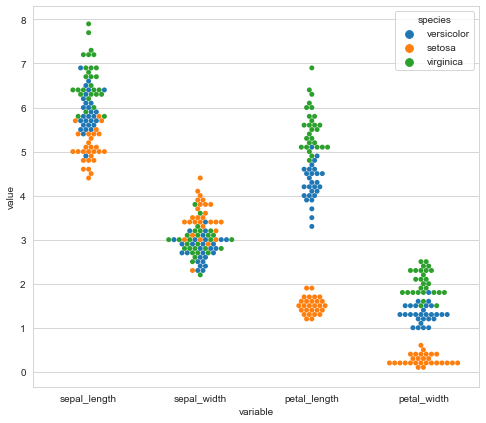

In [40]:
# Creating the swarmplot. Interesting to not that each 'dot' is actually a hexagon. Looking into if that is a changable feature of the chart.

plt.figure(figsize=(8,7))

sns.set_style("whitegrid")
sns.swarmplot(data = train_iris_melt, y='value', x='variable', hue = 'species')

plt.show()

### Takeaways:

- The measurements of each species tend to go in this order: virginica, versicolor, setosa; except when referring to sepal width. Sepal widths for all species are much more closely distributed than the other 3 measurements.
- virginica iris appear to overall have larger and longer petal lengths.
- setosa petals appear to be substatiall smaller (legnth and width) compared to the other two species.


## 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [41]:
# Adding area columns for petal and width, so I won't have to do the math while creating the charts.

In [42]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
# Adding area columns for sepal and petal to the main dataframe. Need to repeat for the train, validate, and test subgroups.

train_iris['sepal_area'] = (train_iris.sepal_length * train_iris.sepal_width)
train_iris['petal_area'] = (train_iris.petal_length * train_iris.petal_width)
train_iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51
...,...,...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa,16.32,0.32
85,6.0,3.4,4.5,1.6,versicolor,20.40,7.20
55,5.7,2.8,4.5,1.3,versicolor,15.96,5.85
44,5.1,3.8,1.9,0.4,setosa,19.38,0.76


In [47]:
# Adding area to my train data.

iris['sepal_area'] = (iris.sepal_length * iris.sepal_width)
iris['petal_area'] = (iris.petal_length * iris.petal_width)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,virginica,21.08,12.42


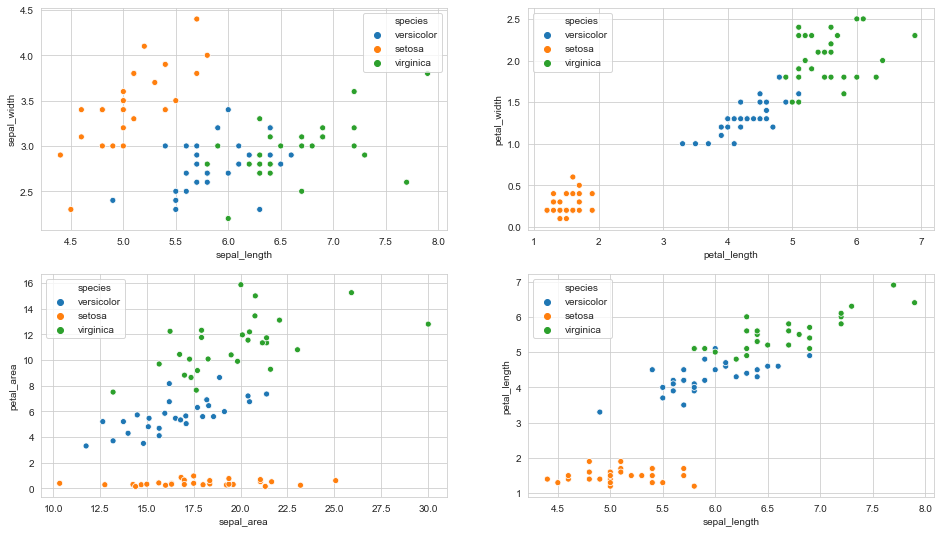

In [48]:
# Creating the 2x2 matrix of scatterplots.

fig, axs = plt.subplots(2,2, figsize=(16,9))

sns.scatterplot(ax=axs[0,0], x='sepal_length', y='sepal_width', hue='species', data=train_iris)
sns.scatterplot(ax=axs[0,1], x='petal_length', y='petal_width', hue='species', data=train_iris)
sns.scatterplot(ax=axs[1,0], x='sepal_area', y='petal_area', hue='species', data=train_iris)
sns.scatterplot(ax=axs[1,1], x='sepal_length', y='petal_length', hue='species', data=train_iris)
plt.show()

#### Takeaways:

- The strongest positive linear correlation is between petal length and petal width. The sepal width and sepal length show almost no linear trend, or a very weak negative one.
- Side observation: virginica measurements have more outliers than the other species in general.

### 4. Create a heatmap of each variable layering correlation coefficient on top.

In [49]:
train_iris_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


In [50]:
pd.crosstab(train_iris_melt.variable, train_iris_melt.value)

value,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,6.4,6.5,6.6,6.7,6.8,6.9,7.2,7.3,7.7,7.9
variable,,,,,,,,,,,,,,,,,,,,,
petal_length,0,0,0,0,0,0,0,0,2,4,...,1,0,0,0,0,1,0,0,0,0
petal_width,2,14,4,6,1,1,4,1,4,10,...,0,0,0,0,0,0,0,0,0,0
sepal_length,0,0,0,0,0,0,0,0,0,0,...,7,2,1,3,1,4,3,1,1,1
sepal_width,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train_corr = train_iris.drop(columns = ['sepal_area', 'petal_area'])
train_corr = train_corr.corr()
train_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.154904,0.867976,0.824691
sepal_width,-0.154904,1.000000,-0.476228,-0.403306
petal_length,0.867976,-0.476228,1.000000,0.957345
petal_width,0.824691,-0.403306,0.957345,1.000000


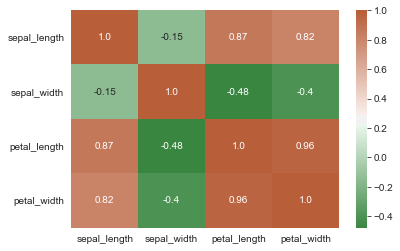

In [52]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(130, 25, as_cmap=True)

sns.heatmap(data = round(train_corr, 2), cmap = cmap, annot = True, fmt=',')

In [53]:
# Using this as example to work from: 
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [54]:
# sns.scatterplot()
train_iris.corr()
# Use this to overlay my heatmap.

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


### 5. Create a scatter matrix visualizing the interaction of each variable

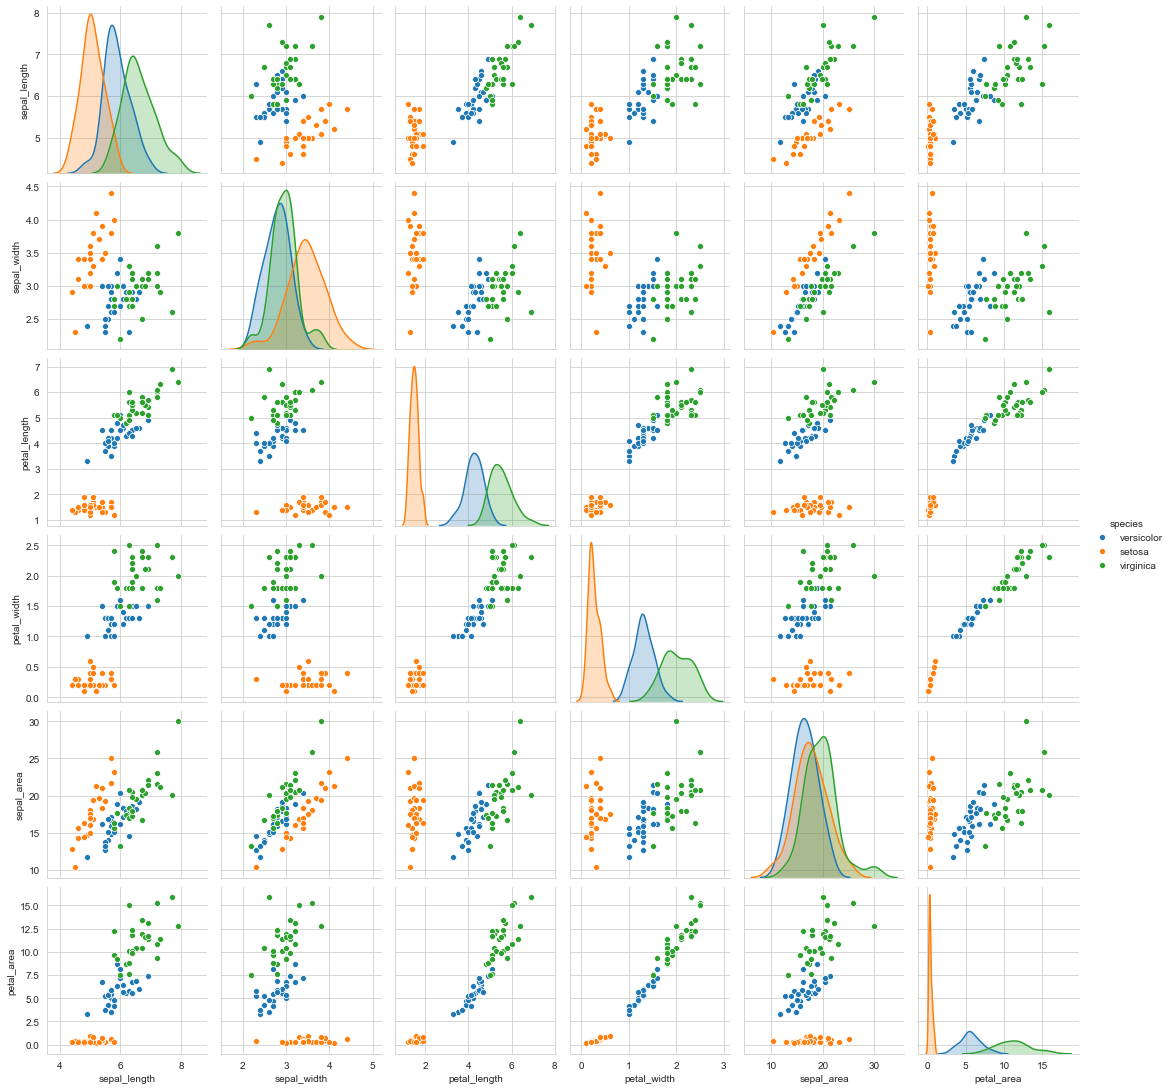

In [57]:
sns.pairplot(train_iris, hue = 'species')
plt.show()

### 6. Is the sepal length significantly different in virginica compared to versicolor? 
#### Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

- What is your takeaway from this statistical testing?

### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.